In [2]:
from imports import *


In [2]:
# Đọc dữ liệu từ file xlsx
df = pd.read_excel(r"D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\Online Retail.xlsx")

## 1. Tiền xử lý dữ liệu

### 1.1 Kiểm tra các thông tin tổng quan, thống kê cơ bản

In [3]:
# In 5 dòng đầu tiên
print("5 DÒNG ĐẦU TIÊN DỮ LIỆU")
print()
print(df.head())
print("-"*100)

# Kiểm tra tổng quan dữ liệu
# Biết dữ liệu có thiếu không, đồng nhất về kiểu dữ liệu không,
# trùng lặp không hay có ngoại lai hay không
print("Thông tin tổng quan dữ liệu")
print()
print(df.info())
print("-"*100)

# Thống kê cơ bản của dữ liệu
# Hiểu rõ cách phân bố của dữ liệu, có lệch không,
# biến động mạnh không, hợp lý không
print("Thống kê cơ bản của dữ liệu")
print()
print(df.describe())
print("-" * 100)

5 DÒNG ĐẦU TIÊN DỮ LIỆU

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
----------------------------------------------------------------------------------------------------
Thông tin tổng quan dữ liệu

<class 'pandas.core.frame.DataFram

### 1.2 Kiểm tra dữ liệu bị thiếu không

In [4]:
# Dữ liệu có thiểu không?
print("Kiểm tra dữ liệu có thiếu hay không")
print()
print(df.isnull().sum())

Kiểm tra dữ liệu có thiếu hay không

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### 1.3 Kiểm tra dữ liệu có đồng nhất về kiểu dữ liệu

In [5]:
# Kiểm tra kiểu dữ liệu có đồng nhất không
print("Kiểm tra đồng nhất dữ liệu")
print()
for col in df.columns:
    data_types = df[col].apply(type).value_counts()
    if len(data_types) > 1:
        print(f"Cột '{col}' có nhiều kiểu dữ liệu:")
        print(data_types)
        print("-" * 50)
    else:
        print(f"Cột '{col}' đồng nhất với kiểu dữ liệu: {data_types.index[0]}")

Kiểm tra đồng nhất dữ liệu

Cột 'InvoiceNo' có nhiều kiểu dữ liệu:
InvoiceNo
<class 'int'>    532618
<class 'str'>      9291
Name: count, dtype: int64
--------------------------------------------------
Cột 'StockCode' có nhiều kiểu dữ liệu:
StockCode
<class 'int'>    487036
<class 'str'>     54873
Name: count, dtype: int64
--------------------------------------------------
Cột 'Description' có nhiều kiểu dữ liệu:
Description
<class 'str'>      540454
<class 'float'>      1454
<class 'int'>           1
Name: count, dtype: int64
--------------------------------------------------
Cột 'Quantity' đồng nhất với kiểu dữ liệu: <class 'int'>
Cột 'InvoiceDate' đồng nhất với kiểu dữ liệu: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Cột 'UnitPrice' đồng nhất với kiểu dữ liệu: <class 'float'>
Cột 'CustomerID' đồng nhất với kiểu dữ liệu: <class 'float'>
Cột 'Country' đồng nhất với kiểu dữ liệu: <class 'str'>


### 1.4 Kiểm tra dữ liệu có lặp lại không

In [6]:
# Kiểm tra có trùng lặp dữ liệu không
print("Kiểm tra dữ liệu có trùng lặp hay không")
print()
print("Số lượng dữ liệu trùng lặp: ",df.duplicated().sum())

Kiểm tra dữ liệu có trùng lặp hay không

Số lượng dữ liệu trùng lặp:  5268


### 1.5 Kiểm tra dữ liệu vô lý

In [7]:
(df.select_dtypes(include=['number']) < 0).sum()

Quantity      10624
UnitPrice         2
CustomerID        0
dtype: int64

# 2. Làm sạch dữ liệu

### 2.1 Loại bỏ dữ liệu bị thiếu

In [8]:
# Xử lý dữ liệu bị thiếu bằng cách xóa các hàng dữ liệu bị thiếu
# Xóa các dòng dữ liệu thiếu CustomerID
df = df.dropna(subset=['CustomerID'])

### 2.2 Loại bỏ dữ liệu bị trùng lặp

In [9]:
# Xóa các hàng dữ liệu bị lặp hoàn toàn
df.drop_duplicates(inplace=True)

### 2.3 Đồng nhất dữ liệu cột InvoiceID

In [11]:
# Đồng nhất dữ liệu cột InvoiceID để sử dụng cho việc chuyển đổi dữ liệu sau này
df['InvoiceNo'] = df['InvoiceNo'].astype(str)


### 2.4 Loại bỏ dữ liệu vô lý

In [12]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

# 4. Chuyển đổi dữ liệu hóa đơn sang dữ liệu khách hàng

In [15]:
# 1. Tạo cột Monetary (giá trị đơn hàng)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 2. Chọn ngày tham chiếu để tính Recency (thường là ngày lớn nhất + 1)
now = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# 3. Tính RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                         # Frequency
    'TotalPrice': 'sum'                             # Monetary
}).reset_index()

# 4. Đổi tên cột cho rõ ràng
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# 5. (Tùy chọn) Kiểm tra tổng quan RFM
print(rfm.describe())

# 6. Ghi ra file Excel
rfm.to_excel(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\RFM_output.xlsx', index=False)
print("Đã lưu thành công vào file RFM_output.xlsx")


         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2048.688081
std     1721.808492   100.014169     7.697998    8985.230220
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     306.482500
50%    15299.500000    51.000000     2.000000     668.570000
75%    16778.750000   142.000000     5.000000    1660.597500
max    18287.000000   374.000000   209.000000  280206.020000
Đã lưu thành công vào file RFM_output.xlsx


# 3. Kiểm tra ngoại lai

### 3.1 Kiểm tra dữ liệu RFM_output có phân phối chuẩn hay không

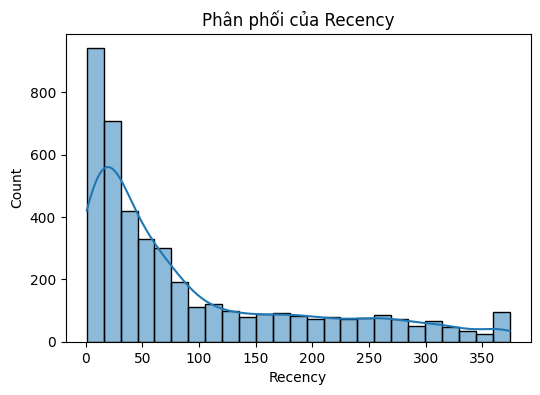

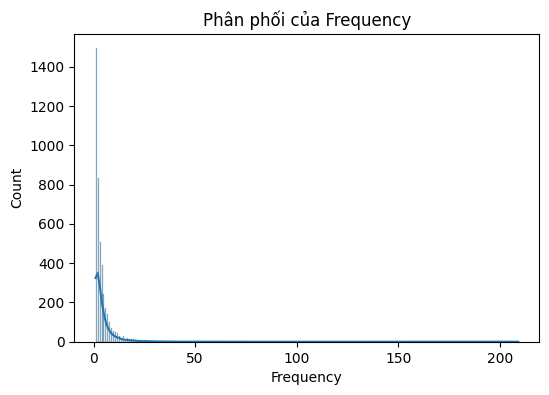

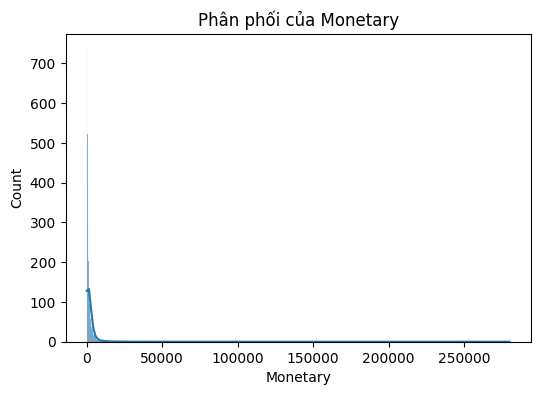

In [16]:
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(6, 4))
    sns.histplot(rfm[col], kde=True)
    plt.title(f'Phân phối của {col}')
    plt.show()

### 3.2 Kiểm tra oulier

In [17]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Cột {column}:")
    print(f"  - Giới hạn dưới: {lower_bound:.2f}")
    print(f"  - Giới hạn trên: {upper_bound:.2f}")
    print(f"  - Số lượng outlier: {len(outliers)}")
    print("-" * 50)
    return outliers

# Gọi hàm cho 3 cột RFM
outliers_recency = detect_outliers_iqr(rfm, 'Recency')
outliers_frequency = detect_outliers_iqr(rfm, 'Frequency')
outliers_monetary = detect_outliers_iqr(rfm, 'Monetary')
# Kiểm tra xem có giá trị âm trong các cột RFM không
negative_values = (rfm[['Recency', 'Frequency', 'Monetary']] < 0).sum()

print("Số lượng giá trị âm trong từng cột RFM:")
print(negative_values)

Cột Recency:
  - Giới hạn dưới: -168.00
  - Giới hạn trên: 328.00
  - Số lượng outlier: 155
--------------------------------------------------
Cột Frequency:
  - Giới hạn dưới: -5.00
  - Giới hạn trên: 11.00
  - Số lượng outlier: 285
--------------------------------------------------
Cột Monetary:
  - Giới hạn dưới: -1724.69
  - Giới hạn trên: 3691.77
  - Số lượng outlier: 425
--------------------------------------------------
Số lượng giá trị âm trong từng cột RFM:
Recency      0
Frequency    0
Monetary     0
dtype: int64


### 3.3 Loại bỏ outliers

In [19]:
# Hàm loại bỏ outlier bằng phương pháp IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Tạo bản sao từ RFM gốc
rfm_clean = rfm.copy()

# Loại bỏ outliers từng cột RFM
for col in ['Recency', 'Frequency', 'Monetary']:
    rfm_clean = remove_outliers_iqr(rfm_clean, col)

# Kiểm tra lại số dòng còn lại
print(f"Số khách hàng còn lại sau khi loại bỏ outlier: {len(rfm_clean)}")

# (Tuỳ chọn) Ghi đè lại vào file Excel
output_path = r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\RFM_output_clean.xlsx'
rfm_clean.to_excel(output_path, index=False)
print(f"Đã lưu dữ liệu sạch ra file: {output_path}")

Số khách hàng còn lại sau khi loại bỏ outlier: 3604
Đã lưu dữ liệu sạch ra file: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\RFM_output_clean.xlsx


# 4. Chuẩn hóa dữ liệu

In [23]:
# Giả sử rfm_clean là DataFrame sau khi loại bỏ outliers
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clean[['Recency', 'Frequency', 'Monetary']])

# Chuyển về DataFrame để dễ sử dụng
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Nếu muốn gắn lại CustomerID:
rfm_scaled_df['CustomerID'] = rfm_clean['CustomerID'].values

# Kiểm tra
output_path = r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\phantichpython\Group_Assign_Final\Data\RFM_scaled.xlsx'
rfm_scaled_df.to_excel(output_path, index=False)

# 5. Tìm số lượng k cụm tối ưu

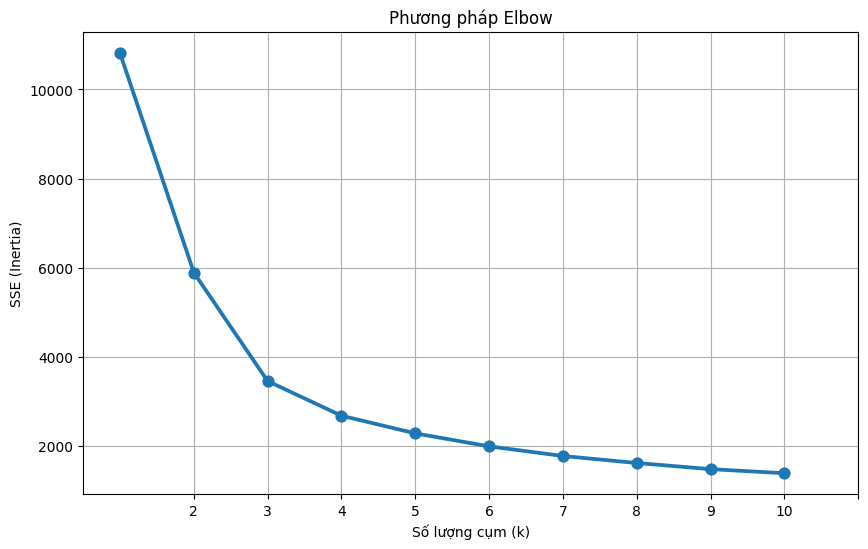

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sse = {}
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled_df[['Recency', 'Frequency', 'Monetary']])  # Sử dụng dữ liệu đã chuẩn hóa
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.title('Phương pháp Elbow')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('SSE (Inertia)')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


In [ ]:
n_clusters = 3 # CHO K =3
model = KMeans(n_clusters=n_clusters, random_state=42)
model.fit(rfm_scaled_df[['Recency', 'Frequency', 'Monetary',]])
#gán cụm và in ra những dòng đầu
rfm_clean['Cluster'] = model.labels_
print("\nDataFrame RFM với thông tin cụm (k=3):")
print(rfm_clean.head())
#Lưu từng cụm dữ liệu vào file CSV riêng biệt
for cluster_id in rfm_clean['Cluster'].unique():
    cluster_data = rfm_clean[rfm_clean['Cluster'] == cluster_id]
    output_file = f'cluster_{cluster_id}.csv'  # Lưu trực tiếp vào thư mục hiện tại
    cluster_data.to_csv(output_file, index=False, encoding='utf-8')
    print(f"\nĐã lưu cụm {cluster_id} vào file: {output_file}")


DataFrame RFM với thông tin cụm (k=3):
   CustomerID  Recency  Frequency  Monetary  Cluster
2       12348       75          4   1797.24        1
3       12349       19          1   1757.55        0
4       12350      310          1    334.40        2
5       12352       36          8   2506.04        1
6       12353      204          1     89.00        2

Đã lưu cụm 1 vào file: cluster_1.csv

Đã lưu cụm 0 vào file: cluster_0.csv

Đã lưu cụm 2 vào file: cluster_2.csv


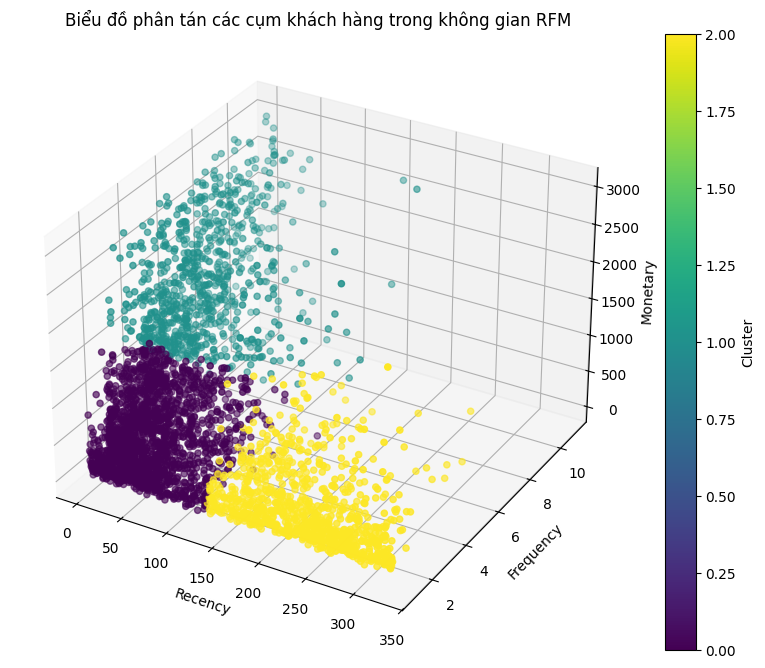

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Vẽ các điểm dữ liệu, màu sắc theo nhãn cụm (Cluster)
scatter = ax.scatter(rfm_clean['Recency'], rfm_clean['Frequency'], rfm_clean['Monetary'],
                   c=rfm_clean['Cluster'], cmap='viridis', marker='o')
# Gán nhãn cho các trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
# Hiển thị thanh màu chú thích cho các cụm
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')
# Đặt tiêu đề cho biểu đồ
plt.title('Biểu đồ phân tán các cụm khách hàng trong không gian RFM')
# Hiển thị biểu đồ
plt.show()


Số lượng khách hàng trong mỗi cụm:
Cluster
0    1879
1     819
2     906
Name: count, dtype: int64


<ipython-input-25-f0f2e483b634>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='viridis')


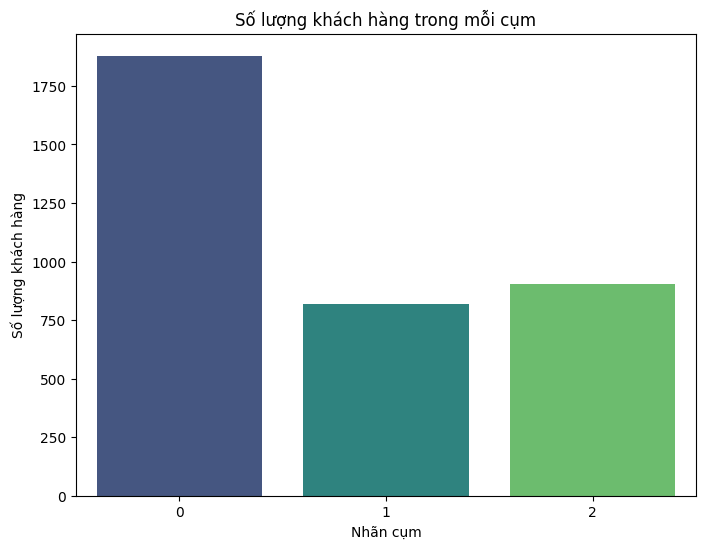

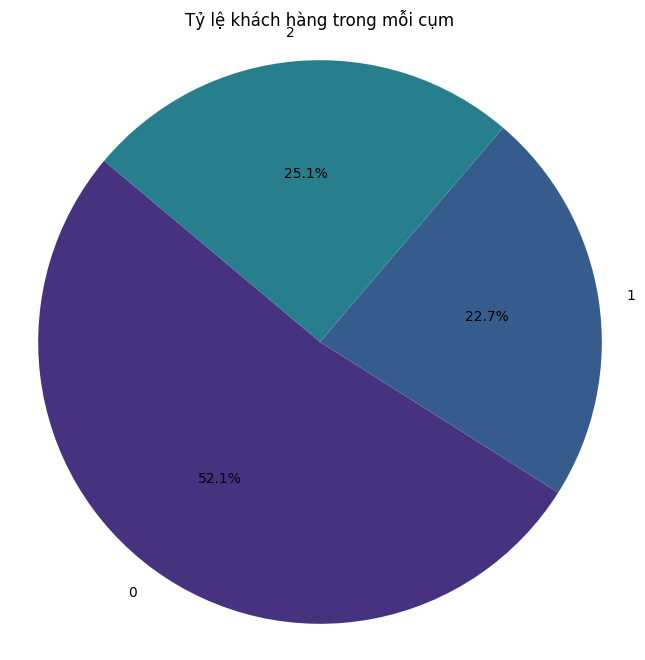

In [ ]:
customer_counts = rfm_clean['Cluster'].value_counts().sort_index()
print("\nSố lượng khách hàng trong mỗi cụm:")
print(customer_counts)
# Trực quan hóa số lượng khách hàng trong mỗi cụm bằng biểu đồ cột
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='viridis')
plt.title('Số lượng khách hàng trong mỗi cụm')
plt.xlabel('Nhãn cụm')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=0)
plt.show()
# Trực quan hóa tỷ lệ khách hàng trong mỗi cụm bằng biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%',
         startangle=140, colors=sns.color_palette('viridis'))
plt.title('Tỷ lệ khách hàng trong mỗi cụm')
plt.axis('equal')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Phân cụm với KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Kiểm tra lại
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary  Cluster
0       12346      326          1  77183.60        3
1       12347        2          7   4310.00        0
2       12348       75          4   1797.24        0
3       12349       19          1   1757.55        0
4       12350      310          1    334.40        1


In [ ]:
# Đọc dữ liệu từ các file CSV của từng cluster
df0 = pd.read_csv('cluster_0.csv')
df1 = pd.read_csv('cluster_1.csv')
df2 = pd.read_csv('cluster_2.csv')


In [ ]:
print("Cụm 0:")
print(df0.describe())

Cụm 0:
         CustomerID      Recency    Frequency     Monetary  Cluster
count   1879.000000  1879.000000  1879.000000  1879.000000   1879.0
mean   15339.103779    49.563598     2.028739   556.254733      0.0
std     1712.495840    35.681335     1.053026   359.586720      0.0
min    12349.000000     1.000000     1.000000     6.200000      0.0
25%    13836.500000    20.000000     1.000000   272.055000      0.0
50%    15407.000000    43.000000     2.000000   488.200000      0.0
75%    16806.500000    73.000000     3.000000   765.330000      0.0
max    18282.000000   157.000000     6.000000  2062.060000      0.0


In [ ]:
print("Cụm 1:")
print(df1.describe())

Cụm 1:
         CustomerID     Recency   Frequency     Monetary  Cluster
count    819.000000  819.000000  819.000000   819.000000    819.0
mean   15312.670330   37.178266    5.688645  1844.403529      1.0
std     1686.981344   39.260212    2.028406   576.786065      0.0
min    12348.000000    1.000000    1.000000   201.120000      1.0
25%    13936.500000    9.000000    4.000000  1397.015000      1.0
50%    15201.000000   24.000000    5.000000  1799.330000      1.0
75%    16815.000000   52.000000    7.000000  2288.450000      1.0
max    18287.000000  236.000000   11.000000  3029.870000      1.0


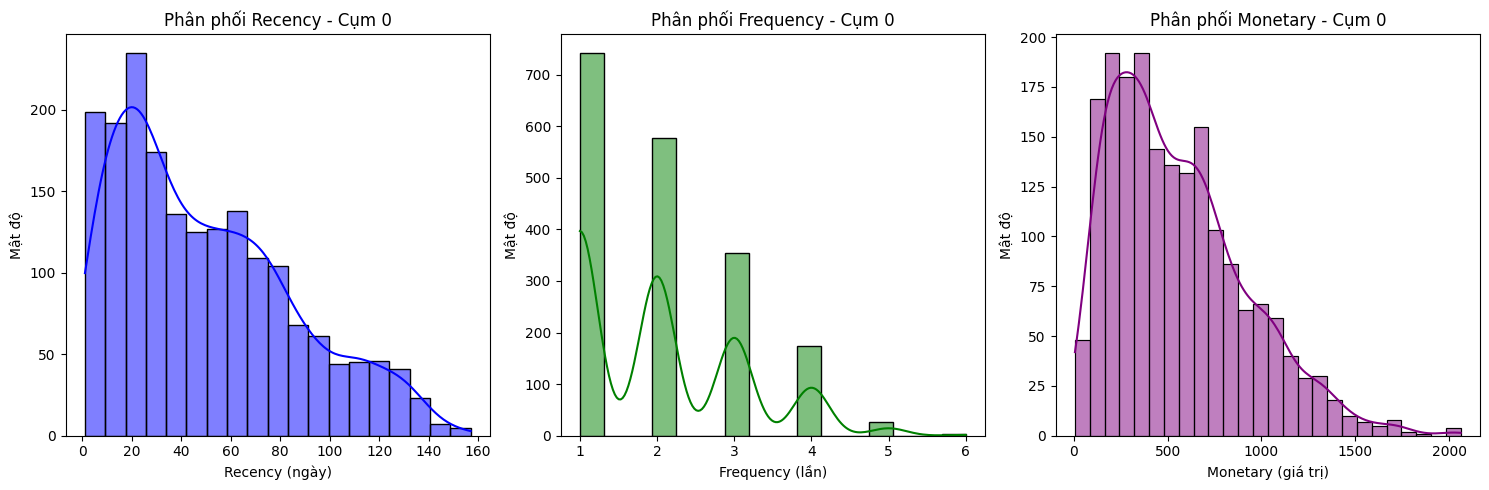

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu của Cluster 0
df0 = pd.read_csv('cluster_0.csv')

# Lọc dữ liệu của Cluster 0 (nếu cần)
cluster_0 = df0[df0['Cluster'] == 0]

# Thiết lập kích thước đồ thị
plt.figure(figsize=(15, 5))

# Vẽ biểu đồ phân phối cho Recency
plt.subplot(1, 3, 1)
sns.histplot(cluster_0['Recency'], kde=True, color='blue')
plt.title('Phân phối Recency - Cụm 0')
plt.xlabel('Recency (ngày)')
plt.ylabel('Mật độ')

# Vẽ biểu đồ phân phối cho Frequency
plt.subplot(1, 3, 2)
sns.histplot(cluster_0['Frequency'], kde=True, color='green')
plt.title('Phân phối Frequency - Cụm 0')
plt.xlabel('Frequency (lần)')
plt.ylabel('Mật độ')

# Vẽ biểu đồ phân phối cho Monetary
plt.subplot(1, 3, 3)
sns.histplot(cluster_0['Monetary'], kde=True, color='purple')
plt.title('Phân phối Monetary - Cụm 0')
plt.xlabel('Monetary (giá trị)')
plt.ylabel('Mật độ')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

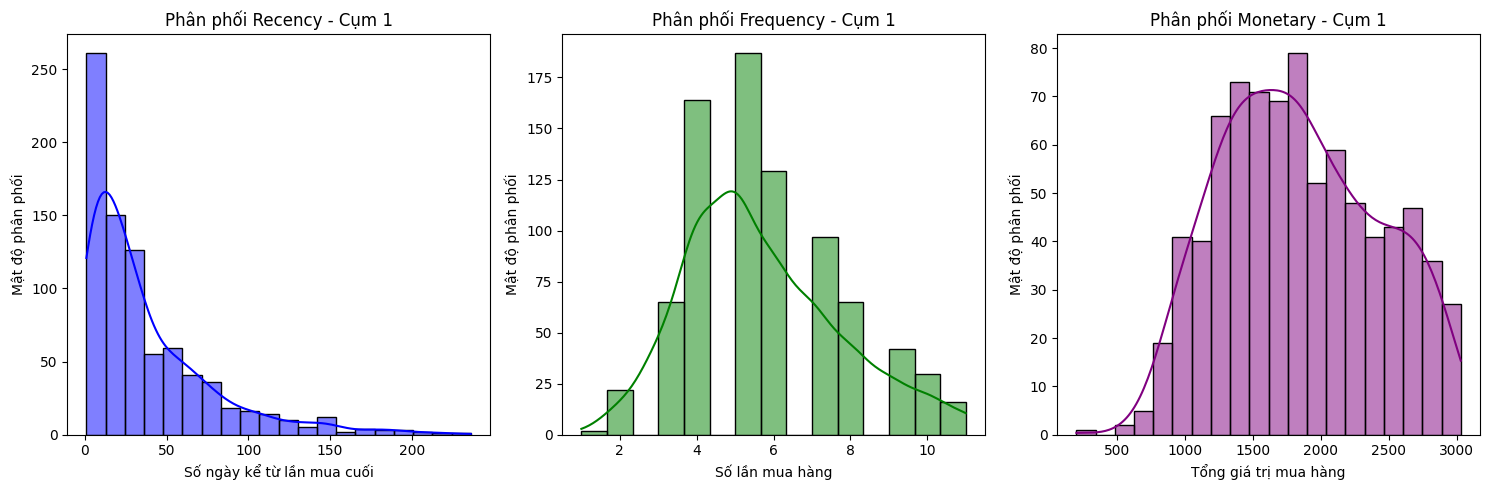

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu từ file cluster_1.csv
df1 = pd.read_csv('cluster_1.csv')

# Lọc dữ liệu chỉ lấy các bản ghi thuộc Cluster 1
cluster_1 = df1[df1['Cluster'] == 1]

# Thiết lập kích thước tổng thể cho biểu đồ
plt.figure(figsize=(15, 5))

# Biểu đồ phân phối Recency (Độ mới)
plt.subplot(1, 3, 1)
sns.histplot(cluster_1['Recency'], kde=True, color='blue', bins=20)
plt.title('Phân phối Recency - Cụm 1')
plt.xlabel('Số ngày kể từ lần mua cuối')
plt.ylabel('Mật độ phân phối')

# Biểu đồ phân phối Frequency (Tần suất)
plt.subplot(1, 3, 2)
sns.histplot(cluster_1['Frequency'], kde=True, color='green', bins=15)
plt.title('Phân phối Frequency - Cụm 1')
plt.xlabel('Số lần mua hàng')
plt.ylabel('Mật độ phân phối')

# Biểu đồ phân phối Monetary (Giá trị)
plt.subplot(1, 3, 3)
sns.histplot(cluster_1['Monetary'], kde=True, color='purple', bins=20)
plt.title('Phân phối Monetary - Cụm 1')
plt.xlabel('Tổng giá trị mua hàng')
plt.ylabel('Mật độ phân phối')

# Tự động điều chỉnh layout và hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
print("Cụm 2:")
print(df2.describe())

Cụm 2:
         CustomerID     Recency   Frequency     Monetary  Cluster
count    906.000000  906.000000  906.000000   906.000000    906.0
mean   15348.618102  227.943709    1.491170   403.202461      2.0
std     1693.096400   53.661926    0.838592   341.581199      0.0
min    12350.000000  131.000000    1.000000     3.750000      2.0
25%    13898.500000  183.000000    1.000000   167.512500      2.0
50%    15311.000000  227.000000    1.000000   309.925000      2.0
75%    16764.500000  270.750000    2.000000   514.037500      2.0
max    18281.000000  327.000000    7.000000  2661.240000      2.0


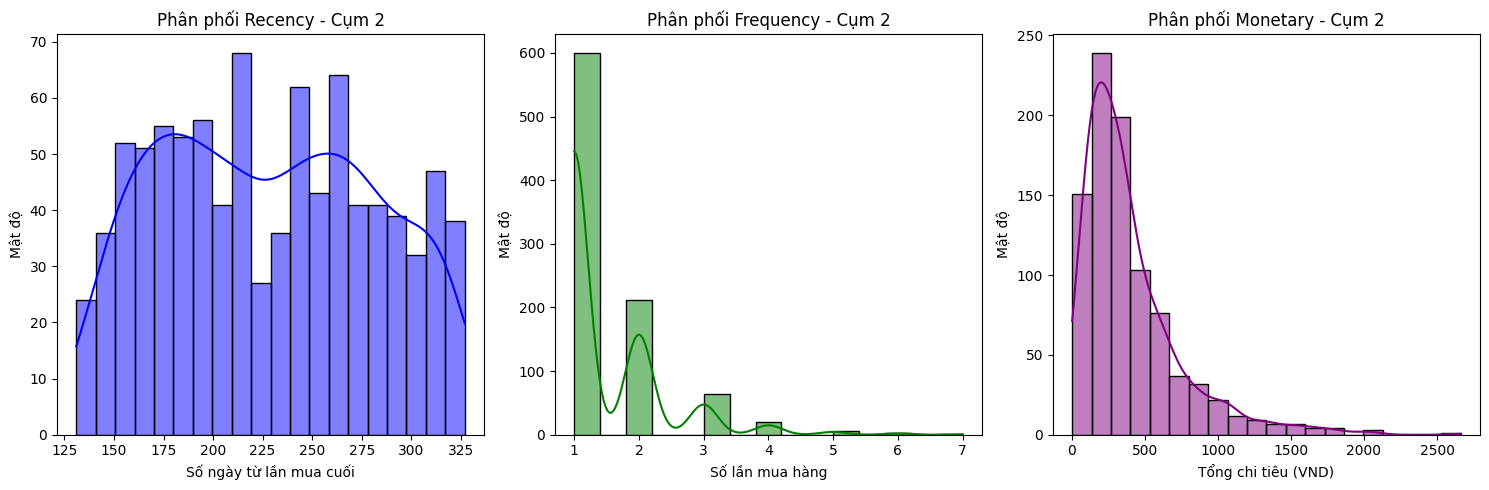

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Đọc dữ liệu Cluster 2 từ file CSV
df2 = pd.read_csv('cluster_2.csv')

# Lọc dữ liệu chỉ lấy các bản ghi thuộc Cluster 2
cluster_2 = df2[df2['Cluster'] == 2]

# Thiết lập kích thước tổng thể cho biểu đồ
plt.figure(figsize=(15, 5))

# Biểu đồ phân phối Recency
plt.subplot(1, 3, 1)
sns.histplot(cluster_2['Recency'],
             kde=True,
             color='blue',
             bins=20,
             edgecolor='black')
plt.title('Phân phối Recency - Cụm 2')
plt.xlabel('Số ngày từ lần mua cuối')
plt.ylabel('Mật độ')

# Biểu đồ phân phối Frequency
plt.subplot(1, 3, 2)
sns.histplot(cluster_2['Frequency'],
             kde=True,
             color='green',
             bins=15,
             edgecolor='black')
plt.title('Phân phối Frequency - Cụm 2')
plt.xlabel('Số lần mua hàng')
plt.ylabel('Mật độ')

# Biểu đồ phân phối Monetary
plt.subplot(1, 3, 3)
sns.histplot(cluster_2['Monetary'],
             kde=True,
             color='purple',
             bins=20,
             edgecolor='black')
plt.title('Phân phối Monetary - Cụm 2')
plt.xlabel('Tổng chi tiêu (VND)')
plt.ylabel('Mật độ')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()